<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(0_4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_0.4'

In [4]:
os.listdir(base_path)

['data_add_delta_0.4_n250.csv',
 'data_add_delta_0.4_n120.csv',
 'data_add_delta_0.4_n60.csv',
 'data_add_delta_0.4_n30.csv',
 'data_add_delta_0.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,81.964062,34.956728,3.997448,130.918238,127.723393,3.194844
1,0.0,1.0,92.773399,58.622957,2.544851,163.941207,161.979127,1.962080
2,0.0,2.0,48.044839,23.368620,-1.888554,79.524905,82.409164,-2.884259
3,0.0,3.0,90.765679,37.479324,-0.344564,137.900439,139.001338,-1.100899
4,0.0,4.0,61.731929,99.071335,4.408300,175.211564,171.158138,4.053426
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,39.909213,71.123441,-2.784964,118.247690,120.862052,-2.614362
19996,999.0,16.0,28.743931,99.546657,-0.215433,138.075156,138.257242,-0.182087
19997,999.0,17.0,24.350732,60.718797,2.068581,97.138110,95.356014,1.782096
19998,999.0,18.0,80.031129,87.869003,-3.529569,174.370563,176.604411,-2.233848


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,81.964062,34.956728,3.997448,130.918238,127.723393,3.194844
1,0.0,1.0,92.773399,58.622957,2.544851,163.941207,161.979127,1.962080
2,0.0,2.0,48.044839,23.368620,-1.888554,79.524905,82.409164,-2.884259
3,0.0,3.0,90.765679,37.479324,-0.344564,137.900439,139.001338,-1.100899
4,0.0,4.0,61.731929,99.071335,4.408300,175.211564,171.158138,4.053426
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,39.909213,71.123441,-2.784964,118.247690,120.862052,-2.614362
19996,999.0,16.0,28.743931,99.546657,-0.215433,138.075156,138.257242,-0.182087
19997,999.0,17.0,24.350732,60.718797,2.068581,97.138110,95.356014,1.782096
19998,999.0,18.0,80.031129,87.869003,-3.529569,174.370563,176.604411,-2.233848


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    81.964062  34.956728  3.997448  130.918238  127.723393  3.194844
      1.0    92.773399  58.622957  2.544851  163.941207  161.979127  1.962080
      2.0    48.044839  23.368620 -1.888554   79.524905   82.409164 -2.884259
      3.0    90.765679  37.479324 -0.344564  137.900439  139.001338 -1.100899
      4.0    61.731929  99.071335  4.408300  175.211564  171.158138  4.053426
...                ...        ...       ...         ...         ...       ...
999.0 15.0   39.909213  71.123441 -2.784964  118.247690  120.862052 -2.614362
      16.0   28.743931  99.546657 -0.215433  138.075156  138.257242 -0.182087
      17.0   24.350732  60.718797  2.068581   97.138110   95.356014  1.782096
      18.0   80.031129  87.869003 -3.529569  174.370563  176.604411 -2.233848
      19.0   47.145654  20.991280 -0.784664   77.352270   78.045924 -0.693654

[20000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    81.964062  34.956728  3.997448  130.918238  127.723393  3.194844
      1.0    92.773399  58.622957  2.544851  163.941207  161.979127  1.962080
      2.0    48.044839  23.368620 -1.888554   79.524905   82.409164 -2.884259
      3.0    90.765679  37.479324 -0.344564  137.900439  139.001338 -1.100899
      4.0    61.731929  99.071335  4.408300  175.211564  171.158138  4.053426
...                ...        ...       ...         ...         ...       ...
999.0 15.0   39.909213  71.123441 -2.784964  118.247690  120.862052 -2.614362
      16.0   28.743931  99.546657 -0.215433  138.075156  138.257242 -0.182087
      17.0   24.350732  60.718797  2.068581   97.138110   95.356014  1.782096
      18.0   80.031129  87.869003 -3.529569  174.370563  176.604411 -2.233848
      19.0   47.145654  20.991280 -0.784664   77.352270   78.045924 -0.693654

[20000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,81.964062,34.956728,3.997448,130.918238,127.723393,3.194844
1,0.0,1.0,92.773399,58.622957,2.544851,163.941207,161.979127,1.962080
2,0.0,2.0,48.044839,23.368620,-1.888554,79.524905,82.409164,-2.884259
3,0.0,3.0,90.765679,37.479324,-0.344564,137.900439,139.001338,-1.100899
4,0.0,4.0,61.731929,99.071335,4.408300,175.211564,171.158138,4.053426
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,39.909213,71.123441,-2.784964,118.247690,120.862052,-2.614362
19996,999.0,16.0,28.743931,99.546657,-0.215433,138.075156,138.257242,-0.182087
19997,999.0,17.0,24.350732,60.718797,2.068581,97.138110,95.356014,1.782096
19998,999.0,18.0,80.031129,87.869003,-3.529569,174.370563,176.604411,-2.233848


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    81.964062  34.956728  3.997448  130.918238  127.723393  3.194844
      1.0    92.773399  58.622957  2.544851  163.941207  161.979127  1.962080
      2.0    48.044839  23.368620 -1.888554   79.524905   82.409164 -2.884259
      3.0    90.765679  37.479324 -0.344564  137.900439  139.001338 -1.100899
      4.0    61.731929  99.071335  4.408300  175.211564  171.158138  4.053426
...                ...        ...       ...         ...         ...       ...
999.0 15.0   39.909213  71.123441 -2.784964  118.247690  120.862052 -2.614362
      16.0   28.743931  99.546657 -0.215433  138.075156  138.257242 -0.182087
      17.0   24.350732  60.718797  2.068581   97.138110   95.356014  1.782096
      18.0   80.031129  87.869003 -3.529569  174.370563  176.604411 -2.233848
      19.0   47.145654  20.991280 -0.784664   77.352270   78.045924 -0.693654

[20000 rows x 6 columns]

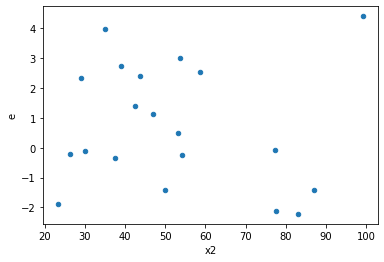

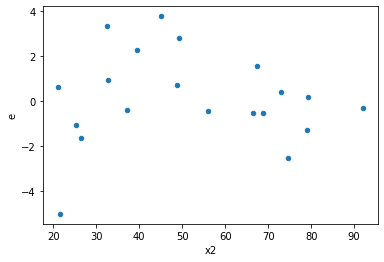

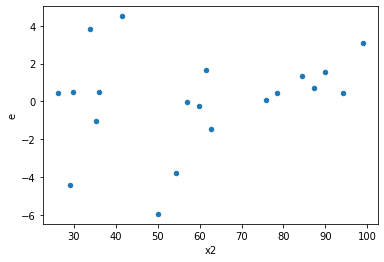

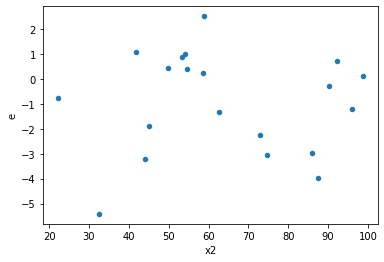

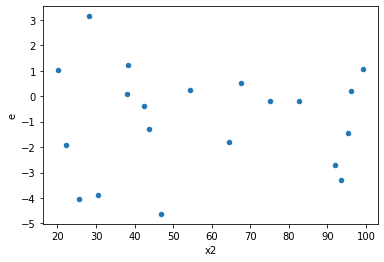

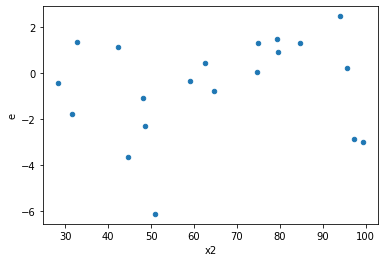

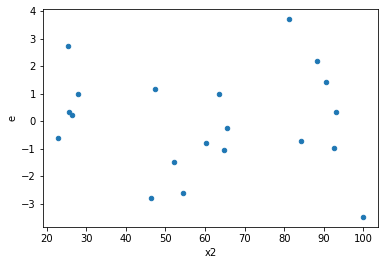

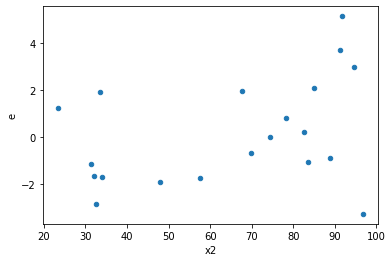

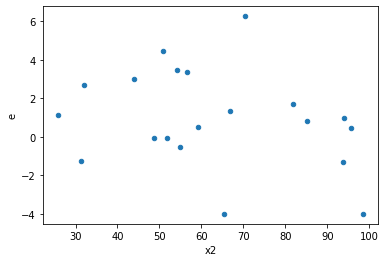

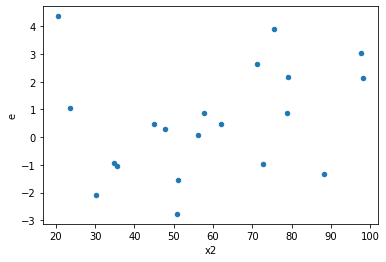

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,6.0,6.0,13.484094821056749,35.112007789535014,2.2473491368427916,5.852001298255836,2.6039573479344074,0.26916689654643666,0.8654165517267817,0.13458344827321833,Reject001=1 : Homoscedasticity
5.0,6.0,6.0,8.841332516146899,22.88976415326521,1.4735554193578164,3.8149606922108688,2.5889495855360836,0.2719722370266693,0.8640138814866654,0.13598611851333464,Reject001=1 : Homoscedasticity
7.0,6.0,6.0,18.632020525546036,42.97506719053488,3.1053367542576726,7.16251119842248,2.306516737227319,0.33262765750765366,0.8336861712461732,0.16631382875382683,Reject001=1 : Homoscedasticity
8.0,6.0,6.0,18.93971075632709,33.43501894615047,3.1566184593878486,5.572503157691745,1.7653394698744809,0.5069621363891392,0.7465189318054304,0.2534810681945696,Reject001=1 : Homoscedasticity
11.0,6.0,6.0,3.67495746129155,10.338764685458916,0.6124929102152583,1.723127447576486,2.813301866581442,0.23368764041374512,0.8831561797931274,0.11684382020687256,Reject001=1 : Homoscedasticity
12.0,6.0,6.0,7.7993269788285,19.312434982592578,1.29988782980475,3.2187391637654295,2.476166858373388,0.29431854280272596,0.852840728598637,0.14715927140136298,Reject001=1 : Homoscedasticity
13.0,6.0,6.0,32.4403563625773,87.26079392167591,5.406726060429549,14.543465653612651,2.689883950298975,0.25380903575736213,0.8730954821213189,0.12690451787868107,Reject001=1 : Homoscedasticity
16.0,6.0,6.0,8.385108467228132,36.22981094134653,1.3975180778713554,6.038301823557755,4.320732532315474,0.09815746267862191,0.950921268660689,0.049078731339310955,Reject001=1 : Homoscedasticity
17.0,6.0,6.0,3.1980582129124153,7.967865400036999,0.5330097021520692,1.327977566672833,2.4914697824655305,0.29115016749988976,0.8544249162500551,0.14557508374994488,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,13.484094821056749,35.112007789535014,2.2473491368427916,5.852001298255836,2.6039573479344074,0.26916689654643666,Reject001=1 : Homoscedasticity
1.0,6.0,6.0,17.749233782906433,8.324649226449706,2.9582056304844055,1.3874415377416176,0.46901456864390606,0.37898551883870096,Reject001=1 : Homoscedasticity
2.0,6.0,6.0,40.758373964856375,14.92815317809298,6.793062327476062,2.4880255296821634,0.36625978236925444,0.246979059291303,Reject001=1 : Homoscedasticity
3.0,6.0,6.0,33.12752612380118,12.360644802387311,5.521254353966864,2.060107467064552,0.3731230867102551,0.25550255998728855,Reject001=1 : Homoscedasticity
4.0,6.0,6.0,46.13596599732735,10.933562559312323,7.689327666221224,1.822260426552054,0.2369856645018705,0.10331927159446003,Reject001=1 : Homoscedasticity
5.0,6.0,6.0,8.841332516146899,22.88976415326521,1.4735554193578164,3.8149606922108688,2.5889495855360836,0.2719722370266693,Reject001=1 : Homoscedasticity
6.0,6.0,6.0,19.528401060787715,6.588445397530318,3.254733510131286,1.0980742329217197,0.3373776161715393,0.21184428031361754,Reject001=1 : Homoscedasticity
7.0,6.0,6.0,18.632020525546036,42.97506719053488,3.1053367542576726,7.16251119842248,2.306516737227319,0.33262765750765366,Reject001=1 : Homoscedasticity
8.0,6.0,6.0,18.93971075632709,33.43501894615047,3.1566184593878486,5.572503157691745,1.7653394698744809,0.5069621363891392,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      990
Reject001=0 : Heteroscedasticity     10
Name: Result_test, dtype: int64